In [21]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings

# Set up plotting style
sns.set_theme()  # Use seaborn's default theme instead of plt.style
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
np.random.seed(42)

In [22]:
# Load
opa_properties = pd.read_csv('data/opa_properties.csv')
opa_assessments = pd.read_csv('data/opa_assessments.csv')
pwd_parcels = pd.read_csv('data/opa_parcels.csv')

# OPA Properties: Sales Price Exploration & Cleaning

In [23]:
# Check for market_value column
print("\nColumns in opa_properties:")
print(opa_properties.columns.tolist())


Columns in opa_properties:
['objectid', 'assessment_date', 'basements', 'beginning_point', 'book_and_page', 'building_code', 'building_code_description', 'category_code', 'category_code_description', 'census_tract', 'central_air', 'cross_reference', 'date_exterior_condition', 'depth', 'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces', 'frontage', 'fuel', 'garage_spaces', 'garage_type', 'general_construction', 'geographic_ward', 'homestead_exemption', 'house_extension', 'house_number', 'interior_condition', 'location', 'mailing_address_1', 'mailing_address_2', 'mailing_care_of', 'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value', 'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms', 'number_stories', 'off_street_open', 'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape', 'quality_grade', 'recording_date', 'registry_number', 'sale_date', 'sale_price', 'separate_utilities', 'sewer', 'site_type', 'sta

Sample of sale_date values:
0    2025-03-28 00:00:00-04:00
1    2025-03-09 00:00:00-05:00
2    2025-01-08 00:00:00-05:00
3    2024-12-20 00:00:00-05:00
4    2025-01-17 00:00:00-05:00
5    2020-01-03 00:00:00-05:00
6    2024-10-24 00:00:00-04:00
7    2025-02-11 00:00:00-05:00
8    2025-02-01 00:00:00-05:00
9    2025-02-07 00:00:00-05:00
Name: sale_date, dtype: object

Unique values in sale_date:
sale_date
1943-01-01 00:00:00-04:00    1062
2015-12-09 00:00:00-05:00     425
2021-11-10 00:00:00-05:00     400
2005-12-21 00:00:00-05:00     384
1985-12-02 00:00:00-05:00     339
2016-07-28 00:00:00-04:00     326
2020-08-14 00:00:00-04:00     285
1998-11-10 00:00:00-05:00     283
2019-02-28 00:00:00-05:00     281
2015-10-20 00:00:00-04:00     267
Name: count, dtype: int64

Potential problematic dates:
['2025-03-28 00:00:00-04:00' '2025-03-09 00:00:00-05:00'
 '2025-01-08 00:00:00-05:00' ... '1947-04-10 00:00:00-05:00'
 '1947-04-08 00:00:00-05:00' '1947-04-03 00:00:00-05:00']

Sale Price Summary:

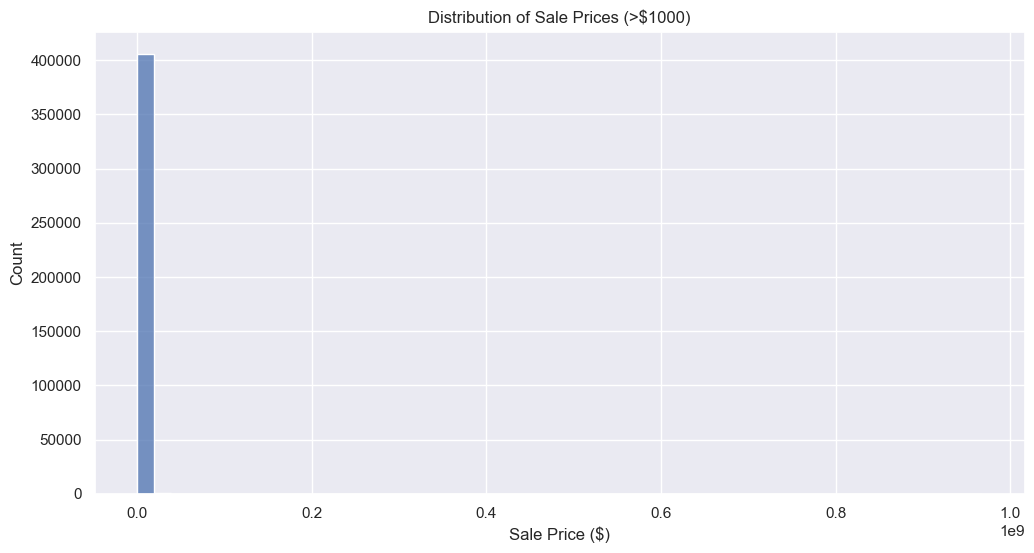

In [24]:
# Examine sale_date format and potential issues
print("Sample of sale_date values:")
print(opa_properties['sale_date'].head(10))

print("\nUnique values in sale_date:")
print(opa_properties['sale_date'].value_counts().head(10))

# Check for problematic dates
print("\nPotential problematic dates:")
print(opa_properties[opa_properties['sale_date'].str.len() != 10]['sale_date'].unique())

# Parsing dates with a specific format and error handling
def safe_parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except:
        return pd.NaT

# Check sale price distribution
print("\nSale Price Summary:")
print(opa_properties['sale_price'].describe())

# Plot sale price distribution (excluding extreme outliers)
plt.figure(figsize=(12, 6))
sns.histplot(data=opa_properties[opa_properties['sale_price'] > 1000], 
             x='sale_price', bins=50)
plt.title('Distribution of Sale Prices (>$1000)')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')
plt.show()


Detailed Sale Price Analysis:

Zero or negative prices:
Count of zero prices: 2041
Count of negative prices: 0

Very low price transactions (≤$1000):
sale_price
1.0     154563
3.0       5966
10.0      3854
0.0       2041
4.0       1864
Name: count, dtype: int64

Price percentiles:
count    5.813530e+05
mean     3.137994e+05
std      9.936177e+06
min      0.000000e+00
0%       0.000000e+00
1%       1.000000e+00
5%       1.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      5.500000e+04
75%      1.800000e+05
90%      3.500000e+05
95%      5.400000e+05
99%      1.966838e+06
100%     9.680000e+08
max      9.680000e+08
Name: sale_price, dtype: float64


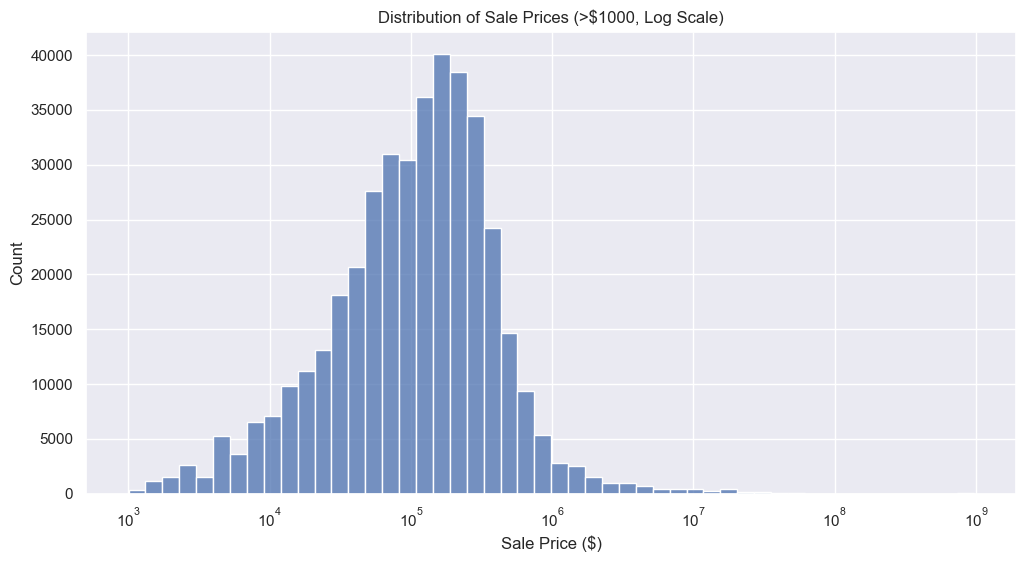

In [25]:
# Detailed Sale Price Analysis
print("\nDetailed Sale Price Analysis:")

# Check for zero and negative prices
print("\nZero or negative prices:")
print(f"Count of zero prices: {(opa_properties['sale_price'] == 0).sum()}")
print(f"Count of negative prices: {(opa_properties['sale_price'] < 0).sum()}")

# Look at very low price transactions
print("\nVery low price transactions (≤$1000):")
print(opa_properties[opa_properties['sale_price'] <= 1000]['sale_price'].value_counts().head())

# Examine price percentiles for better binning
print("\nPrice percentiles:")
percentiles = [0.0, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0]
print(opa_properties['sale_price'].describe(percentiles=percentiles))

# Create a log-transformed plot to better see the distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=opa_properties[opa_properties['sale_price'] > 1000], 
             x='sale_price', bins=50, log_scale=True)
plt.title('Distribution of Sale Prices (>$1000, Log Scale)')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')
plt.show()

## OPA Properties: Initial Sales Price Analysis
- Low-Value Transactions (≤$1000):
  - 154,563 properties at $1 (likely family transfers or non-market transactions)
  - 2,041 properties at $0 (likely missing data or administrative entries)
  - About 168,288 transactions (29% of data) are ≤$1000
  
- Price Distribution (from percentiles):
  - 25th percentile is $1 (showing how many non-market transactions we have)
  - Median (50th) is $55,000
  - 75th percentile is $180,000
  - 90th percentile is $350,000
  - 99th percentile is $1,966,838
  
- The Log-Scale Plot shows:
  - A more normal-looking distribution after filtering >$1000
  - Peak around $100,000-$200,000
  - Long right tail extending to $100M

### Sales Date Format

The data cleaning process standardizes property sale dates by converting string values to datetime objects. It handles invalid formats through coercion and manages timezone information.

The cleaning filter keeps only dates that:
- Are not null/NaN values
- Are on or after January 1, 1980
- Are on or before December 31, 2024

creates mask 'valid_dates'

Sample of sale_date values:
0    2025-03-28 00:00:00-04:00
1    2025-03-09 00:00:00-05:00
2    2025-01-08 00:00:00-05:00
3    2024-12-20 00:00:00-05:00
4    2025-01-17 00:00:00-05:00
5    2020-01-03 00:00:00-05:00
6    2024-10-24 00:00:00-04:00
7    2025-02-11 00:00:00-05:00
8    2025-02-01 00:00:00-05:00
9    2025-02-07 00:00:00-05:00
Name: sale_date, dtype: object

Unique values in sale_date:
sale_date
1943-01-01 00:00:00-04:00    1062
2015-12-09 00:00:00-05:00     425
2021-11-10 00:00:00-05:00     400
2005-12-21 00:00:00-05:00     384
1985-12-02 00:00:00-05:00     339
2016-07-28 00:00:00-04:00     326
2020-08-14 00:00:00-04:00     285
1998-11-10 00:00:00-05:00     283
2019-02-28 00:00:00-05:00     281
2015-10-20 00:00:00-04:00     267
Name: count, dtype: int64

Date Analysis:
Total records: 584103
Valid dates: 581378
Invalid dates: 2725

Date Range (all dates):
Earliest: 1700-01-01 04:56:00
Latest: 2025-03-28 04:00:00

Date Range (valid dates 1980-2024):
Earliest: 1980-01-01 05:00:0

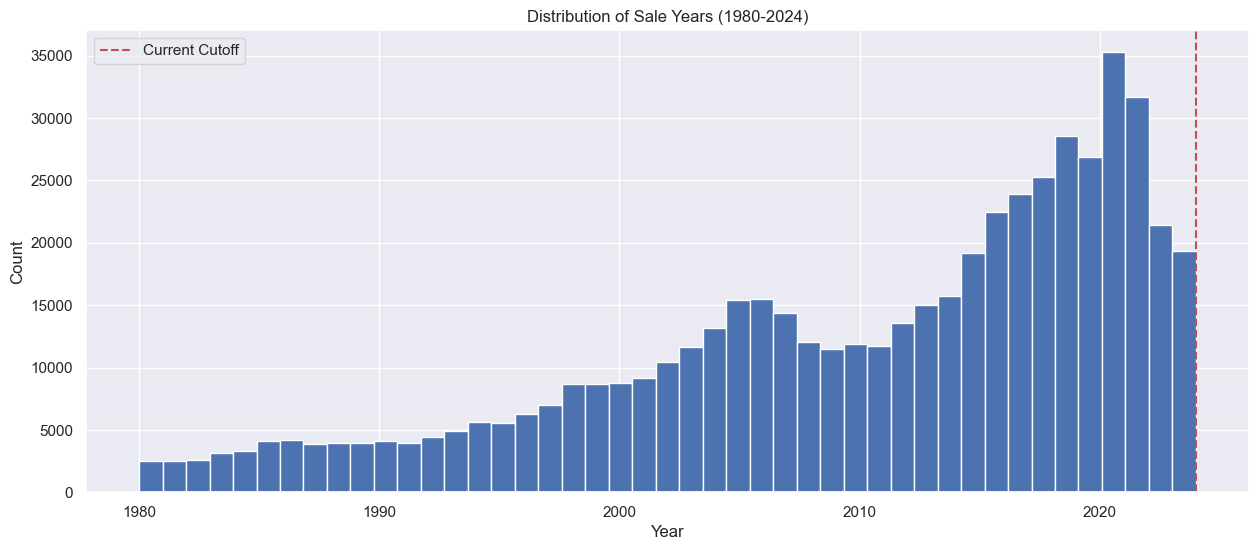

In [26]:
# Examine sale_date format and potential issues
print("Sample of sale_date values:")
print(opa_properties['sale_date'].head(10))

print("\nUnique values in sale_date:")
print(opa_properties['sale_date'].value_counts().head(10))

# Parse dates with proper timezone handling
opa_properties['sale_date_clean'] = pd.to_datetime(opa_properties['sale_date'], errors='coerce', utc=True)
# Convert to local time and remove timezone
opa_properties['sale_date_clean'] = opa_properties['sale_date_clean'].dt.tz_convert(None)

# Analyze the cleaned dates
print("\nDate Analysis:")
print(f"Total records: {len(opa_properties)}")
print(f"Valid dates: {opa_properties['sale_date_clean'].notna().sum()}")
print(f"Invalid dates: {opa_properties['sale_date_clean'].isna().sum()}")

# Look at date range and filter
min_date = pd.Timestamp('1980-01-01')
current_date = pd.Timestamp('2024-12-31')

valid_dates_mask = (
    opa_properties['sale_date_clean'].notna() & 
    (opa_properties['sale_date_clean'] >= min_date) & 
    (opa_properties['sale_date_clean'] <= current_date)
)

print("\nDate Range (all dates):")
print(f"Earliest: {opa_properties['sale_date_clean'].min()}")
print(f"Latest: {opa_properties['sale_date_clean'].max()}")

print("\nDate Range (valid dates 1980-2024):")
valid_dates = opa_properties[valid_dates_mask]['sale_date_clean']
print(f"Earliest: {valid_dates.min()}")
print(f"Latest: {valid_dates.max()}")

# Look at year distribution
year_counts = valid_dates.dt.year.value_counts().sort_index()
print("\nSales by year (1980-2024):")
print(year_counts)

# Focus on recent years
print("\nRecent Years (2020-2024):")
recent_years = year_counts[year_counts.index >= 2020]
print(recent_years)

# Plot the distribution
plt.figure(figsize=(15, 6))
plt.hist(valid_dates.dt.year, bins=45)  # 45 bins for 1980-2024
plt.title('Distribution of Sale Years (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.axvline(x=2024, color='r', linestyle='--', label='Current Cutoff')
plt.legend()
plt.show()

In [27]:
# Create a new DataFrame with only valid dates (1980-2024)
valid_properties = opa_properties[valid_dates_mask].copy()

# Verify the new dataframe
print(f"Original DataFrame size: {len(opa_properties)} rows")
print(f"Valid dates DataFrame size: {len(valid_properties)} rows")
print(f"Removed {len(opa_properties) - len(valid_properties)} rows with invalid dates")

# Confirm all dates are valid
print("\nDate range in filtered DataFrame:")
print(f"Earliest: {valid_properties['sale_date_clean'].min()}")
print(f"Latest: {valid_properties['sale_date_clean'].max()}")

Original DataFrame size: 584103 rows
Valid dates DataFrame size: 537243 rows
Removed 46860 rows with invalid dates

Date range in filtered DataFrame:
Earliest: 1980-01-01 05:00:00
Latest: 2024-12-30 05:00:00


### OPA Properties: Sales Date Analysis
- Data Quality:
  - 581,378 valid dates (99.5%)
  - 2,725 invalid dates (0.5%)
  - Many dates outside our target range (pre-1980 or 2025+)
  - Removed 46,860 records with invalid or out-of-range dates
  
Valid Date Range (1980-2024):
- Earliest: 1980-01-01
- Latest: 2024-12-30
- Excluded 2025 (partial year)

After filtering (1980-2024):
- Original DataFrame: 584,103 rows
- Valid dates DataFrame: 537,243 rows
- Removed 46,860 rows (8.0%)

Sales Volume Trends:
- 1980s: ~2,500-4,000 sales per year
- 1990s: ~4,000-8,700 sales per year
- 2000s: ~8,700-15,500 sales per year
- 2010s: ~11,700-28,500 sales per year
- 2020s: Peak of 35,273 sales in 2021

Recent Years Pattern (2020-2024):
- 2020: 26,900 sales
- 2021: 35,273 sales (peak)
- 2022: 31,705 sales
- 2023: 21,395 sales
- 2024: 19,362 sales

The Plot Shows:
- Clear upward trend in sales volume over time
- Significant peaks and valleys (e.g., 2008 housing crisis dip)
- Recent high activity in 2021-2022


### Sales Price Cleaning

In [28]:
def clean_sales_data(df):
    """
    Clean the sales data with handling of zip codes and price outlier detection
    """
    print("Starting sales data cleaning...")
    
    # Optimize data types
    df['sale_price'] = df['sale_price'].astype('float32')
    df['parcel_number'] = df['parcel_number'].astype('int32')
    if 'market_value' in df.columns:
        df['market_value'] = df['market_value'].astype('float32')
    
    # 1. Price filtering - remove non-market transactions
    df['is_valid_sale'] = df['sale_price'] > 1000
    print(f"Valid sales (>$1000): {df['is_valid_sale'].sum()} / {len(df)}")
    
    # 1b. Market value validation
    if 'market_value' in df.columns:
        df['is_valid_market_value'] = df['market_value'] > 1000
        print(f"Valid market values (>$1000): {df['is_valid_market_value'].sum()} / {len(df)}")
    
    # 2. Clean zip codes
    print("\nCleaning zip codes...")
    df['zip_code'] = df['zip_code'].fillna('00000').astype(str).str.extract(r'(\d+)', expand=False).fillna('00000').str.zfill(5)
    df['zip_code'] = df['zip_code'].astype('category')
    print(f"Unique zip code lengths after cleaning: {df['zip_code'].str.len().unique()}")
    print(f"Number of unique zip codes: {df['zip_code'].nunique()}")
    
    # 3. Date validation
    df['is_valid_date'] = (
        df['sale_date_clean'].notna() & 
        (df['sale_date_clean'] <= pd.Timestamp('2024-12-31')) &
        (df['sale_date_clean'] >= pd.Timestamp('1980-01-01'))
    )
    print(f"\nValid dates: {df['is_valid_date'].sum()} / {len(df)}")
    
    # 4. Check parcel numbers
    print("\nChecking parcel numbers...")
    print(f"Unique parcel numbers: {df['parcel_number'].nunique()}")
    
    # 5. Bundled sales detection using memory-efficient approach
    print("\nDetecting bundled sales...")
    
    # Create the sale_date_only column first
    df['sale_date_only'] = df['sale_date_clean'].dt.date
    
    # Round prices to reduce combinations
    df['rounded_price'] = (df['sale_price'] / 1000).round() * 1000
    
    # Initialize the bundled sales column
    df['is_bundled'] = False
    
    # Get valid entries only for bundled sales detection
    valid_sales_mask = df['is_valid_sale'] & df['is_valid_date']
    valid_df = df[valid_sales_mask].copy()
    
    # Process each zip code separately
    bundled_count = 0
    for zip_code in valid_df['zip_code'].unique():
        print(f"Processing zip code {zip_code}...")
        zip_df = valid_df[valid_df['zip_code'] == zip_code]
        
        # Count sales with the same date and rounded price
        counts = zip_df.groupby(['sale_date_only', 'rounded_price']).size()
        suspicious_groups = counts[counts >= 10].index
        
        if len(suspicious_groups) > 0:
            # Get indices of bundled sales in this zip code
            for date, price in suspicious_groups:
                mask = (df['zip_code'] == zip_code) & (df['sale_date_only'] == date) & (df['rounded_price'] == price)
                df.loc[mask, 'is_bundled'] = True
                bundled_count += mask.sum()
    
    print(f"Bundled sales identified: {bundled_count}")
    
    # Clean up intermediate columns
    df.drop(['sale_date_only', 'rounded_price'], axis=1, inplace=True)
    
    # 6. Price outlier detection by zip code
    print("\nDetecting price outliers...")
    df['is_price_outlier'] = False
    valid_mask = df['is_valid_sale'] & df['is_valid_date'] & ~df['is_bundled'] 
    
    for zip_code in df['zip_code'].unique():
        zip_mask = (df['zip_code'] == zip_code) & valid_mask
        if zip_mask.sum() >= 10:
            prices = df.loc[zip_mask, 'sale_price']
            q1, q99 = prices.quantile([0.01, 0.99])
            iqr = q99 - q1
            df.loc[zip_mask, 'is_price_outlier'] = (
                (prices < (q1 - 3 * iqr)) | 
                (prices > (q99 + 3 * iqr))
            )
    
    # Final valid transaction flag
    df['is_valid_transaction'] = (
        df['is_valid_sale'] & 
        df['is_valid_date'] & 
        ~df['is_bundled'] & 
        ~df['is_price_outlier']
    )
    
    # Enhanced summary
    print("\nEnhanced Cleaning Summary:")
    print(f"Total records: {len(df)}")
    print(f"Valid transactions: {df['is_valid_transaction'].sum()} ({df['is_valid_transaction'].mean():.1%})")
    
    return df


In [29]:
# Call the function on filtered DataFrame
cleaned_properties = clean_sales_data(valid_properties)

Starting sales data cleaning...
Valid sales (>$1000): 392936 / 537243
Valid market values (>$1000): 537090 / 537243

Cleaning zip codes...
Unique zip code lengths after cleaning: [5]
Number of unique zip codes: 54

Valid dates: 537243 / 537243

Checking parcel numbers...
Unique parcel numbers: 537243

Detecting bundled sales...
Processing zip code 19138...
Processing zip code 19135...
Processing zip code 19140...
Processing zip code 19133...
Processing zip code 19144...
Processing zip code 19120...
Processing zip code 19104...
Processing zip code 19132...
Processing zip code 19124...
Processing zip code 19148...
Processing zip code 19125...
Processing zip code 19114...
Processing zip code 19115...
Processing zip code 19146...
Processing zip code 19136...
Processing zip code 19152...
Processing zip code 19150...
Processing zip code 19122...
Processing zip code 19107...
Processing zip code 19121...
Processing zip code 19141...
Processing zip code 19131...
Processing zip code 19139...
Pro

1. Price Validation:
- Filtered non-market transactions (≤$1,000)
- Identified outliers using zip code-based percentile analysis
  - We recognized that property values vary significantly by neighborhood. Instead of using a single threshold for the entire dataset, we analyzed each zip code separately
  - For each zip code, we:
    - Calculated the 1st and 99th percentiles of property prices
    - - Determined the range between these percentiles (similar to IQR)
    - Flagged properties with prices that fell extremely far (3× this range) outside these boundaries
- Flagged 3,490 bundled sales (bulk transactions)
  - To identify bundled sales (bulk transactions), we used the following method:
    - Grouped by location: Analyzed each zip code separately to identify local patterns
    - Price standardization: Rounded prices to the nearest $1,000 to account for minor variations
    - Temporal clustering: Examined sales occurring on the same calendar date
    - Threshold identification: Flagged groups with 10+ properties sold on the same day at the same price in the same zip code
    - Pattern detection: Processed each zip code iteratively to find these suspicious transaction clusters
  
1. Data Enrichment:
- Standardized zip codes
  - Filled missing zip codes with '00000'
  - Extracted numeric portions using regex
  - Ensured consistent 5-digit format with leading zeros
  - Converted to categorical data type for grouping
- Optimized data types for efficiency
  - Converted numerical columns to appropriate types (float32, int32)
  - Changed zip codes to categorical format to reduce memory usage
  - Improved performance for large dataset operations


Results
Clean dataset: 388,535 valid transactions (72.3% of date-valid records)
Date range: January 1980 to December 2024

Starting sales data cleaning...
Valid sales (>$1000): 392936 / 537243
Valid market values (>$1000): 537090 / 537243

Cleaning zip codes...
Unique zip code lengths after cleaning: [5]
Number of unique zip codes: 54

Valid dates: 537243 / 537243

Checking parcel numbers...
Unique parcel numbers: 537243

Detecting bundled sales...
Processing zip code 19138...
Processing zip code 19135...
Processing zip code 19140...
Processing zip code 19133...
Processing zip code 19144...
Processing zip code 19120...
Processing zip code 19104...
Processing zip code 19132...
Processing zip code 19124...
Processing zip code 19148...
Processing zip code 19125...
Processing zip code 19114...
Processing zip code 19115...
Processing zip code 19146...
Processing zip code 19136...
Processing zip code 19152...
Processing zip code 19150...
Processing zip code 19122...
Processing zip code 19107...
Processing zip code 19121...
Processing zip code 19141...
Processing zip code 19131...
Processing zip code 19139...
Pro

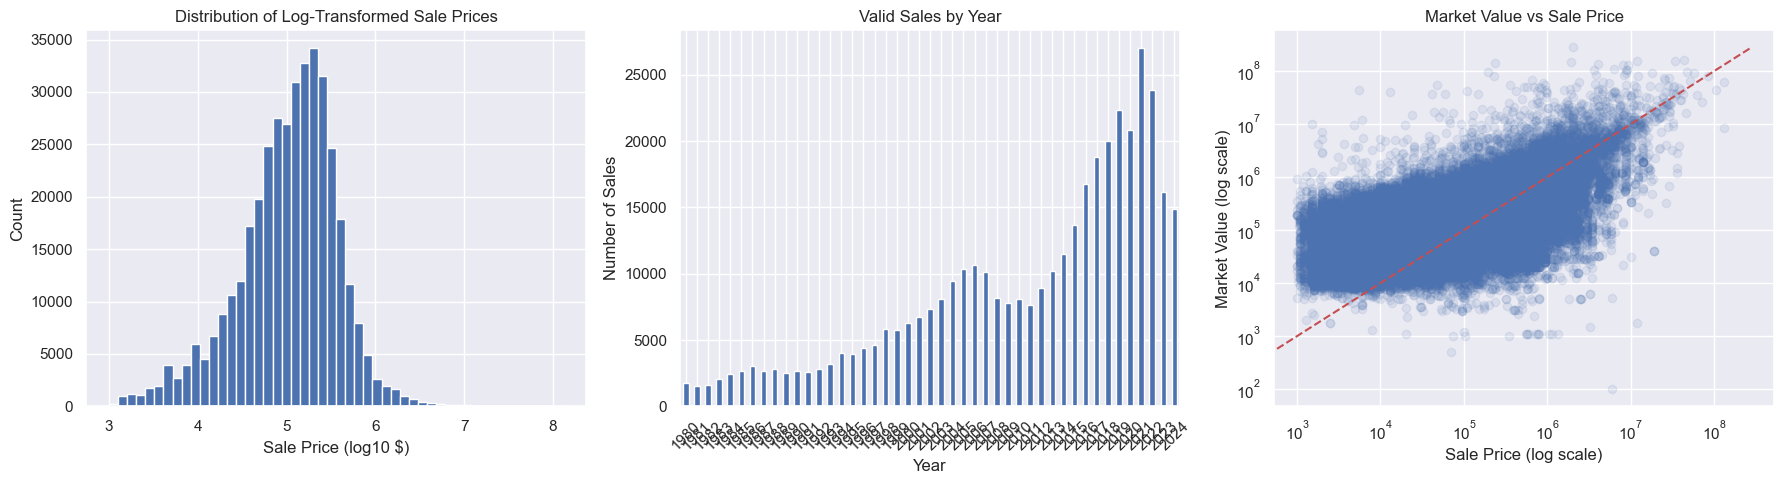

In [30]:
def analyze_cleaned_sales(df):
    """
    Analyze the results of sales data cleaning to verify the output looks reasonable.
    """
    print("\n=== Sales Cleaning Analysis ===")
    
    # 1. Basic statistics for valid transactions
    valid_sales = df[df['is_valid_transaction']]
    print("\nValid Sales Statistics:")
    print(valid_sales['sale_price'].describe().round(2))
    
    # Add log-transformed column for better visualization
    valid_sales['sale_price_log'] = np.log10(valid_sales['sale_price'].clip(lower=1))
    
    # 1b. Market value statistics if available
    if 'market_value' in valid_sales.columns:
        print("\nMarket Value Statistics for Valid Transactions:")
        print(valid_sales['market_value'].describe().round(2))
        
        # Add log-transformed market value
        valid_sales['market_value_log'] = np.log10(valid_sales['market_value'].clip(lower=1))
        
        # Calculate and report ratio
        valid_sales['value_to_price_ratio'] = valid_sales['market_value'] / valid_sales['sale_price']
        print("\nMarket Value to Sale Price Ratio:")
        print(valid_sales['value_to_price_ratio'].describe().round(2))
    
    # 2. Temporal distribution
    print("\nSales by Year (valid transactions only):")
    year_counts = valid_sales['sale_date_clean'].dt.year.value_counts().sort_index()
    print(year_counts)
    
    # 3. Rejection reasons
    print("\nRejection Analysis:")
    print(f"Total records: {len(df)}")
    print(f"Invalid sales (<=$1000): {(~df['is_valid_sale']).sum()}")
    print(f"Invalid dates: {(~df['is_valid_date']).sum()}")
    print(f"Bundled sales: {df['is_bundled'].sum()}")
    print(f"Price outliers: {df['is_price_outlier'].sum()}")
    
    # 4. Quick visualization
    plt.figure(figsize=(18, 5))
    
    # Sale price distribution for valid transactions using log-transformed values
    plt.subplot(1, 3, 1)
    plt.hist(valid_sales['sale_price_log'], bins=50)
    plt.title('Distribution of Log-Transformed Sale Prices')
    plt.xlabel('Sale Price (log10 $)')
    plt.ylabel('Count')
    
    # Sales over time
    plt.subplot(1, 3, 2)
    valid_sales['sale_date_clean'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title('Valid Sales by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Sales')
    plt.xticks(rotation=45)
    
    # Market value vs sale price if available
    if 'market_value' in valid_sales.columns:
        plt.subplot(1, 3, 3)
        plt.scatter(
            valid_sales['sale_price'], 
            valid_sales['market_value'],
            alpha=0.1
        )
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Sale Price (log scale)')
        plt.ylabel('Market Value (log scale)')
        plt.title('Market Value vs Sale Price')
        # Add a 45-degree line (where market value = sale price)
        max_val = max(valid_sales['sale_price'].max(), valid_sales['market_value'].max())
        min_val = min(valid_sales['sale_price'].min(), valid_sales['market_value'].min())
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    # Add more spacing between subplots
    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()
    plt.show()
    
    return valid_sales

# Run both functions
cleaned_properties = clean_sales_data(valid_properties)
valid_sales_df = analyze_cleaned_sales(cleaned_properties)


=== Additional Market Value Analysis ===

Correlation between Market Value and Sale Price:
              market_value  sale_price
market_value      1.000000    0.453029
sale_price        0.453029    1.000000

Correlation between Log-transformed Market Value and Sale Price:
                  market_value_log  sale_price_log
market_value_log           1.00000         0.67732
sale_price_log             0.67732         1.00000


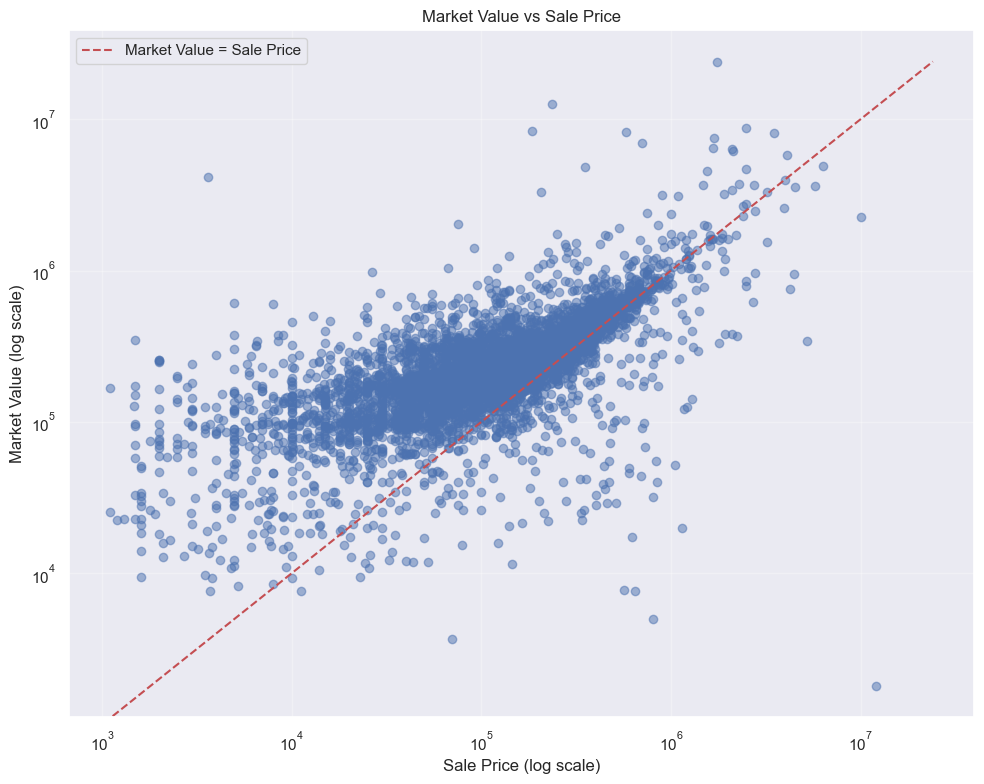

In [31]:
# Additional Market Value Analysis
print("\n=== Additional Market Value Analysis ===")

# Check the correlation between market value and sale price
if 'market_value' in valid_sales_df.columns and 'sale_price' in valid_sales_df.columns:
    correlation = valid_sales_df[['market_value', 'sale_price']].corr()
    print("\nCorrelation between Market Value and Sale Price:")
    print(correlation)
    
    # Calculate correlation with log-transformed values
    if 'market_value_log' in valid_sales_df.columns and 'sale_price_log' in valid_sales_df.columns:
        log_correlation = valid_sales_df[['market_value_log', 'sale_price_log']].corr()
        print("\nCorrelation between Log-transformed Market Value and Sale Price:")
        print(log_correlation)
    
    # Create a simple scatter plot of market value vs sale price
    plt.figure(figsize=(10, 8))
    # Sample 5000 points to make the plot cleaner
    sample_size = min(5000, len(valid_sales_df))
    sample_df = valid_sales_df.sample(sample_size, random_state=42)
    
    plt.scatter(
        sample_df['sale_price'], 
        sample_df['market_value'],
        alpha=0.5
    )
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Sale Price (log scale)')
    plt.ylabel('Market Value (log scale)')
    plt.title('Market Value vs Sale Price')
    
    # Add a 45-degree line (where market value = sale price)
    max_val = max(sample_df['sale_price'].max(), sample_df['market_value'].max())
    min_val = min(sample_df['sale_price'].min(), sample_df['market_value'].min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Market Value = Sale Price')
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# OPA Properties: Data Quality Assessment & Cleaning Continued - Feature Columns

In [32]:
def clean_columns(df):
    """
    Clean and select only the columns needed for analysis/modeling.
    """
    print("\n=== Column Cleaning ===")
    
    # Display original columns
    print(f"Original columns ({len(df.columns)}):")
    print(df.columns.tolist())
    
    # Define columns to drop - not useful for property value prediction
    drop_cols = [
        'objectid', 'book_and_page', 'cross_reference', 'registry_number',
        'owner_1', 'owner_2', 'mailing_address_1', 'mailing_address_2', 
        'mailing_care_of', 'mailing_city_state', 'mailing_street', 'mailing_zip',
        'assessment_date', 'recording_date', 'market_value_date',
        'taxable_building', 'taxable_land', 'exempt_building', 'exempt_land', 
        'homestead_exemption', 'state_code', 'street_code', 'shape',
        'beginning_point', 'is_bundled', 'is_price_outlier', 'is_valid_sale',
        'is_valid_date', 'sale_date','type_heater', 'unfinished', 'unit',
        'utility', 'separate_utilities', 'sewer', 'site_type', 'view_type', 
        'year_built_estimate', 'census_tract', 'geographic_ward', 'location',
        'street_designation', 'street_direction', 'street_name', 'suffix', 
        'off_street_open', 'other_building', 'house_extension', 'house_number', 
        'date_exterior_condition', 'basements', 'building_code', 
        'building_code_description', 'building_code_new', 
        'building_code_description_new', 'fireplaces', 'frontage', 
        'fuel', 'parcel_shape', 'quality_grade'
    ]
    
    # Check for columns with high missing rates
    missing_rates = df.isnull().mean()
    high_missing_cols = missing_rates[missing_rates > 0.5].index.tolist()
    
    if high_missing_cols:
        print(f"\nColumns with >50% missing values:")
        for col in high_missing_cols:
            print(f"  {col}: {missing_rates[col]:.1%} missing")
        
        # Add high missing columns to drop list
        drop_cols.extend([col for col in high_missing_cols if col not in drop_cols])
    
    # Check which columns to drop actually exist
    drop_cols = [col for col in drop_cols if col in df.columns]
    
    # Create a new dataframe without the dropped columns
    cleaned_df = df.drop(columns=drop_cols)
    
    # Display resulting dataframe info
    print(f"\nRemoved {len(drop_cols)} columns")
    print(f"Remaining columns ({len(cleaned_df.columns)}):")
    print(cleaned_df.columns.tolist())
    
    # Feature engineering based on metadata
    print("\n=== Feature Engineering ===")
    
    # Condition transformations (based on metadata)
    # Convert condition codes to ordinal if present
    condition_cols = ['exterior_condition', 'interior_condition']
    for col in condition_cols:
        if col in cleaned_df.columns:
            # Based on metadata, conditions are ordinal with 0-9 scale
            # Lower numbers are better (1=newer/better, 9=worst)
            try:
                cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
                # Create a simplified condition rating (1=excellent, 2=good, 3=average, 4=below avg, 5=poor)
                col_name = col.replace('_condition', '_rating')
                cleaned_df[col_name] = pd.cut(
                    cleaned_df[col], 
                    bins=[0, 2, 3, 4, 6, 10],
                    labels=['Excellent', 'Good', 'Average', 'Below Average', 'Poor'],
                    include_lowest=True
                )
                print(f"Added {col_name} from {col}")
            except:
                print(f"Could not convert {col} to ordinal")
    
    # Age of property (if year_built exists)
    if 'year_built' in cleaned_df.columns:
        current_year = datetime.now().year
        cleaned_df['property_age'] = current_year - cleaned_df['year_built']
        print("Added property_age feature")
        
        # Create age buckets for non-linear effects
        cleaned_df['age_category'] = pd.cut(
            cleaned_df['property_age'],
            bins=[0, 10, 25, 50, 75, 100, 200],
            labels=['New (≤10)', 'Recent (11-25)', 'Established (26-50)', 
                   'Older (51-75)', 'Historic (76-100)', 'Very Historic (>100)'],
            include_lowest=True
        )
        print("Added age_category feature")
    
    # Age of sale (years since sale)
    if 'sale_date_clean' in cleaned_df.columns:
        cleaned_df['years_since_sale'] = (datetime.now() - cleaned_df['sale_date_clean']).dt.days / 365.25
        print("Added years_since_sale feature")
        
        # Extract sale year and month for seasonality
        cleaned_df['sale_year'] = cleaned_df['sale_date_clean'].dt.year
        cleaned_df['sale_month'] = cleaned_df['sale_date_clean'].dt.month
        
        # Add sale quarter and season for potential seasonal effects
        cleaned_df['sale_quarter'] = cleaned_df['sale_date_clean'].dt.quarter
        
        # Map months to seasons (1=Winter, 2=Spring, 3=Summer, 4=Fall)
        season_map = {1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}
        cleaned_df['sale_season'] = cleaned_df['sale_month'].map(season_map)
        
        print("Added sale_year, sale_month, sale_quarter, and sale_season features")
    
    # Total area per room (if both exist)
    if 'total_area' in cleaned_df.columns and 'number_of_rooms' in cleaned_df.columns:
        cleaned_df['area_per_room'] = cleaned_df['total_area'] / cleaned_df['number_of_rooms'].replace(0, np.nan)
        print("Added area_per_room feature")
    
    # Bathroom to bedroom ratio
    if 'number_of_bathrooms' in cleaned_df.columns and 'number_of_bedrooms' in cleaned_df.columns:
        cleaned_df['bath_bed_ratio'] = cleaned_df['number_of_bathrooms'] / cleaned_df['number_of_bedrooms'].replace(0, np.nan)
        print("Added bath_bed_ratio feature")
        
    # Rooms per floor
    if 'number_of_rooms' in cleaned_df.columns and 'number_stories' in cleaned_df.columns:
        cleaned_df['rooms_per_floor'] = cleaned_df['number_of_rooms'] / cleaned_df['number_stories'].replace(0, np.nan)
        print("Added rooms_per_floor feature")
        
    # Living area ratio (if both fields exist)
    if 'total_livable_area' in cleaned_df.columns and 'total_area' in cleaned_df.columns:
        cleaned_df['livable_area_ratio'] = cleaned_df['total_livable_area'] / cleaned_df['total_area'].replace(0, np.nan)
        print("Added livable_area_ratio feature")
    
    # Property size categories
    if 'total_area' in cleaned_df.columns:
        cleaned_df['size_category'] = pd.cut(
            cleaned_df['total_area'],
            bins=[0, 1000, 1500, 2000, 3000, 5000, float('inf')],
            labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large', 'Huge'],
            include_lowest=True
        )
        print("Added size_category feature")
    
    # Create log-transformed market value if it doesn't exist already
    if 'market_value' in cleaned_df.columns and 'market_value_log' not in cleaned_df.columns:
        cleaned_df['market_value_log'] = np.log10(cleaned_df['market_value'].clip(lower=1))
        print("Added market_value_log feature")
    
    # Value ratio feature
    if 'market_value' in cleaned_df.columns and 'sale_price' in cleaned_df.columns:
        cleaned_df['value_price_ratio'] = cleaned_df['market_value'] / cleaned_df['sale_price']
        # Clip extreme values to prevent outliers
        cleaned_df['value_price_ratio'] = cleaned_df['value_price_ratio'].clip(0.1, 10)
        print("Added value_price_ratio feature")
    
    # Explore data types and convert to appropriate types
    cleaned_df = convert_dtypes(cleaned_df)
    
    # Check for any remaining missing values
    print("\n=== Missing Values After Processing ===")
    missing = cleaned_df.isnull().sum()
    print(missing[missing > 0].sort_values(ascending=False))
    
    # Drop rows with missing target variable if needed
    if 'sale_price' in cleaned_df.columns:
        before = len(cleaned_df)
        cleaned_df = cleaned_df.dropna(subset=['sale_price'])
        dropped = before - len(cleaned_df)
        if dropped > 0:
            print(f"\nDropped {dropped} rows with missing sale_price")
    
    # Show correlation with target variable
    if 'sale_price_log' in cleaned_df.columns:
        print("\n=== Top Correlations with sale_price_log ===")
        correlations = cleaned_df.select_dtypes(include=['number']).corr()['sale_price_log'].abs().sort_values(ascending=False)
        print(correlations.head(10))
    
    return cleaned_df

In [33]:
def convert_dtypes(df):
    """
    Convert columns to appropriate data types and handle categorical encoding
    """
    # Define columns that should be categorical 
    categorical_cols = [
        'number_of_bedrooms', 'number_of_bathrooms',
        'number_stories', 'central_air', 'exterior_condition',
        'interior_condition', 'garage_type', 'general_construction',
        'category_code', 'zoning'
    ]
    
    # Lists for different encoding types
    binary_cols = ['central_air']  # Simple binary features (Y/N)
    ordinal_cols = ['exterior_condition', 'interior_condition']  # Ordered categories
    onehot_cols = []  # Will store columns to one-hot encode
    
    for col in df.columns:
        # Skip special columns
        if col in ['sale_date_clean']:
            continue
            
        # Convert specified columns to categorical
        if col in categorical_cols and col in df.columns:
            df[col] = df[col].astype('category')
            print(f"Converted {col} to categorical")
            
            # Add to onehot list if nominal categorical and not binary/ordinal
            if col not in binary_cols and col not in ordinal_cols:
                if df[col].nunique() <= 15:  # Only one-hot encode if reasonable number of categories
                    onehot_cols.append(col)
            
        # Convert to category if few unique values
        elif df[col].nunique() < 100 and df[col].dtype == 'object':
            df[col] = df[col].astype('category')
            
            # Consider for one-hot encoding if few categories
            if df[col].nunique() <= 15:
                onehot_cols.append(col)
        
        # Convert float64 to float32
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
            
        # Convert int64 to int32
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    
    # One-hot encoding for selected categorical variables
    if onehot_cols:
        print(f"\nOne-hot encoding {len(onehot_cols)} categorical features:")
        for col in onehot_cols:
            print(f"  - {col} ({df[col].nunique()} categories)")
            # Get dummies and drop the original column
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat([df, dummies], axis=1)
            # Don't drop the original categorical version yet, to allow for different modeling approaches
            # df = df.drop(columns=[col])
    
    return df

In [34]:
model_ready_df = clean_columns(valid_sales_df)


=== Column Cleaning ===
Original columns (89):
['objectid', 'assessment_date', 'basements', 'beginning_point', 'book_and_page', 'building_code', 'building_code_description', 'category_code', 'category_code_description', 'census_tract', 'central_air', 'cross_reference', 'date_exterior_condition', 'depth', 'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces', 'frontage', 'fuel', 'garage_spaces', 'garage_type', 'general_construction', 'geographic_ward', 'homestead_exemption', 'house_extension', 'house_number', 'interior_condition', 'location', 'mailing_address_1', 'mailing_address_2', 'mailing_care_of', 'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value', 'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms', 'number_stories', 'off_street_open', 'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape', 'quality_grade', 'recording_date', 'registry_number', 'sale_date', 'sale_price', 'separate_utilities', 'sewer

In [35]:
# Finalize the dataset for modeling by removing unhelpful columns
def finalize_dataset(df, missing_threshold=0.30):
    """
    Final cleaning step that drops columns with too many missing values
    and other columns that aren't helpful based on our exploration
    """
    print("\n=== Finalizing Dataset ===")
    initial_cols = len(df.columns)
    initial_rows = len(df)
    
    # Calculate missing rates
    missing_rates = df.isnull().mean()
    
    # Identify columns with too many missing values
    high_missing = missing_rates[missing_rates > missing_threshold].index.tolist()
    print(f"Dropping {len(high_missing)} columns with >{missing_threshold:.0%} missing values:")
    for col in high_missing:
        print(f"  - {col}: {missing_rates[col]:.1%} missing")
    
    # Drop columns with high missing rates
    df = df.drop(columns=high_missing)
    
    # Redundant columns to drop
    redundant_pairs = [
        # Keep log versions over original
        ('market_value', 'market_value_log'),  # Keep log version
        ('sale_price', 'sale_price_log'),      # Keep log version
        
        # Keep derived categorical versions over raw values
        ('exterior_condition', 'exterior_rating'),     # Keep rating 
        ('interior_condition', 'interior_rating'),     # Keep rating
        ('year_built', 'age_category'),               # Keep category
        ('total_area', 'size_category'),              # Keep category
        
        # Flags/validation columns not needed for modeling
        ('is_valid_transaction', None),  # Drop - not needed after filtering
        ('is_valid_market_value', None), # Drop - not needed after filtering
    ]
    
    # Drop redundant columns, keeping the better version
    drop_redundant = []
    for original, replacement in redundant_pairs:
        if original in df.columns:
            if replacement is None or replacement in df.columns:
                drop_redundant.append(original)
    
    if drop_redundant:
        print(f"\nDropping {len(drop_redundant)} redundant columns:")
        for col in drop_redundant:
            print(f"  - {col}")
        df = df.drop(columns=drop_redundant)
    
    # Drop PIN since it's likely redundant with parcel_number
    # Commenting this out to keep pin for joining with other datasets
    # if 'pin' in df.columns:
    #     df = df.drop(columns=['pin'])
    #     print("\nDropped pin (redundant with parcel_number)")
    
    # Convert remaining string dtypes to category if they're not already
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
        print(f"Converted {col} to category")
    
    # Remove rows with missing target variable
    if 'sale_price_log' in df.columns:
        before = len(df)
        df = df.dropna(subset=['sale_price_log'])
        dropped = before - len(df)
        if dropped > 0:
            print(f"\nDropped {dropped} rows with missing sale_price_log")
    
    # Final dataset summary
    print(f"\nFinal dataset: {len(df)} rows × {len(df.columns)} columns")
    print(f"Reduced from {initial_cols} to {len(df.columns)} columns")
    print(f"Removed {initial_rows - len(df)} rows with missing critical values")
    
    # Show remaining columns
    print("\nRemaining columns:")
    print(df.columns.tolist())
    
    
    # Show correlations with target variable if it exists
    if 'sale_price_log' in df.columns:
        print("\n=== Feature Correlations with Target (sale_price_log) ===")
        
        # Get numeric columns for correlation analysis
        numeric_cols = df.select_dtypes(include=['number']).columns
        numeric_corrs = df[numeric_cols].corr()['sale_price_log'].sort_values(ascending=False)
        
        # Print top positive correlations
        print("\nTop Positive Correlations:")
        print(numeric_corrs.head(10))
        
        # Print top negative correlations
        print("\nTop Negative Correlations:")
        print(numeric_corrs.tail(10))
        
        # Visualize the most important correlations
        plt.figure(figsize=(12, 8))
        top_features = numeric_corrs.drop('sale_price_log')[abs(numeric_corrs).sort_values(ascending=False).drop('sale_price_log').index[:15]]
        sns.barplot(x=top_features.values, y=top_features.index)
        plt.title('Top 15 Feature Correlations with Sale Price (Log)')
        plt.xlabel('Correlation Coefficient')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    return df


=== Finalizing Dataset ===
Dropping 2 columns with >30% missing values:
  - central_air: 42.9% missing
  - bath_bed_ratio: 30.0% missing

Dropping 8 redundant columns:
  - market_value
  - sale_price
  - exterior_condition
  - interior_condition
  - year_built
  - total_area
  - is_valid_transaction
  - is_valid_market_value

Final dataset: 388535 rows × 49 columns
Reduced from 59 to 49 columns
Removed 0 rows with missing critical values

Remaining columns:
['category_code', 'category_code_description', 'depth', 'garage_spaces', 'general_construction', 'number_of_bathrooms', 'number_of_bedrooms', 'number_stories', 'parcel_number', 'topography', 'total_livable_area', 'zip_code', 'zoning', 'pin', 'sale_date_clean', 'sale_price_log', 'market_value_log', 'value_to_price_ratio', 'exterior_rating', 'interior_rating', 'property_age', 'age_category', 'years_since_sale', 'sale_year', 'sale_month', 'sale_quarter', 'sale_season', 'livable_area_ratio', 'size_category', 'value_price_ratio', 'categ

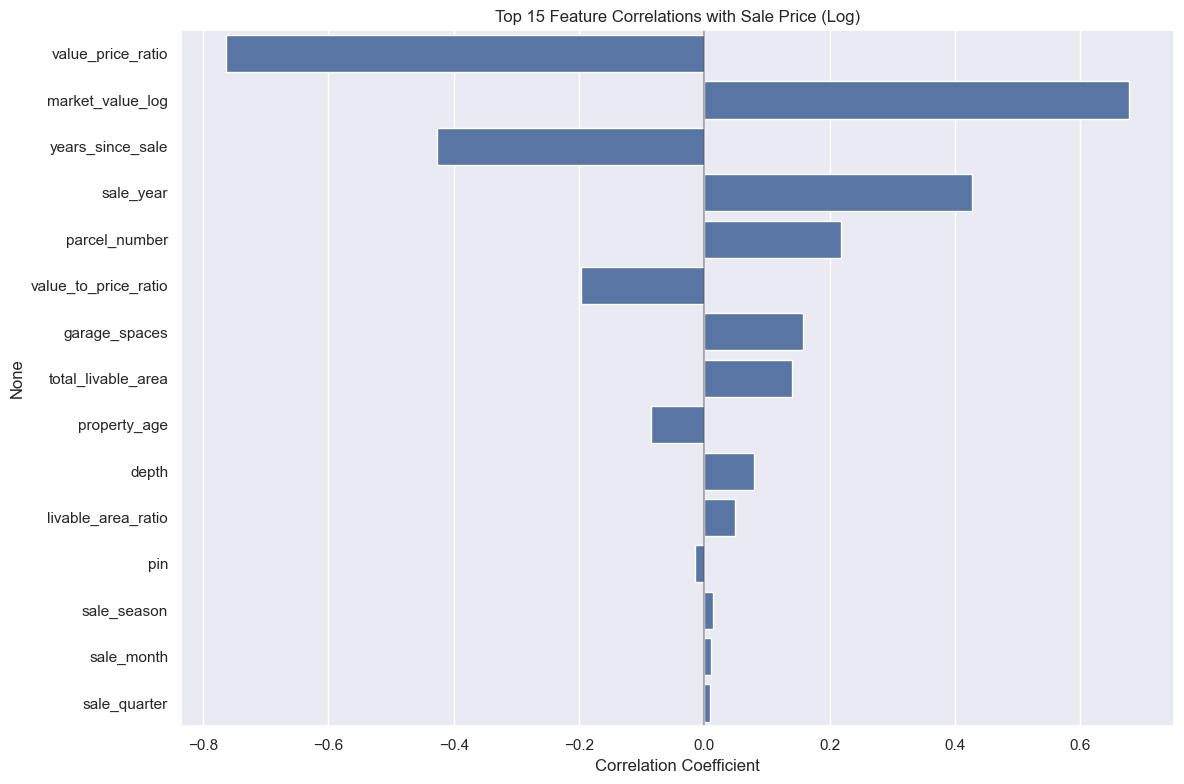

In [36]:
final_df = finalize_dataset(model_ready_df)

In [37]:
# Save the finalized dataset to CSV
#final_df.to_csv('final_properties_for_model.csv', index=False)


=== Final Dataset Preview ===
   category_code category_code_description  depth  garage_spaces  \
3              1             SINGLE FAMILY   73.0            0.0   
6              1             SINGLE FAMILY   96.0            0.0   
44             1             SINGLE FAMILY   45.0            0.0   
57             6               VACANT LAND   50.0            NaN   
76             1             SINGLE FAMILY   80.0            1.0   

   general_construction number_of_bathrooms number_of_bedrooms number_stories  \
3                    A                  1.0                3.0            2.0   
6                    A                  2.0                3.0            2.0   
44                   A                  1.0                3.0            2.0   
57                  NaN                 NaN                NaN            NaN   
76                   E                  1.0                3.0            2.0   

    parcel_number topography  total_livable_area zip_code zoning         

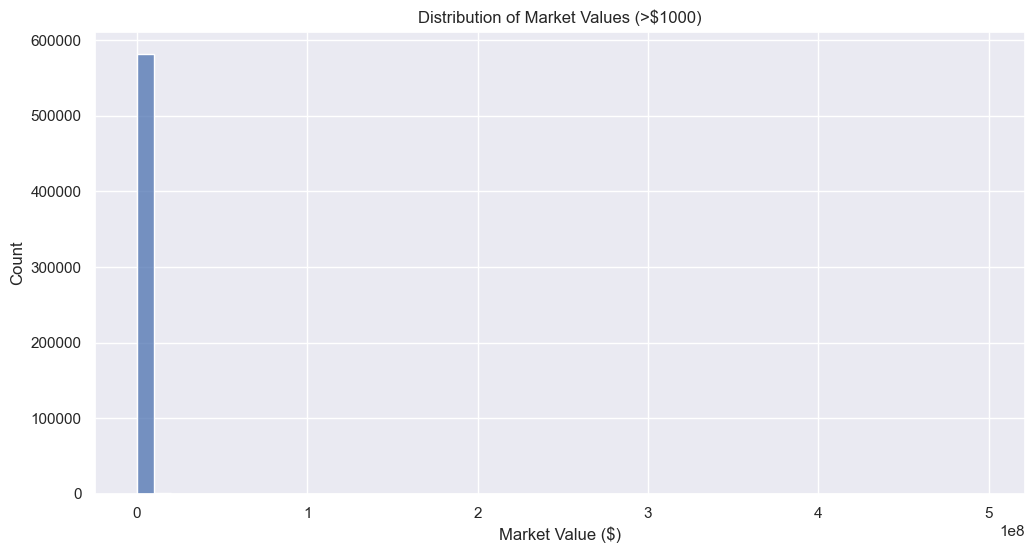

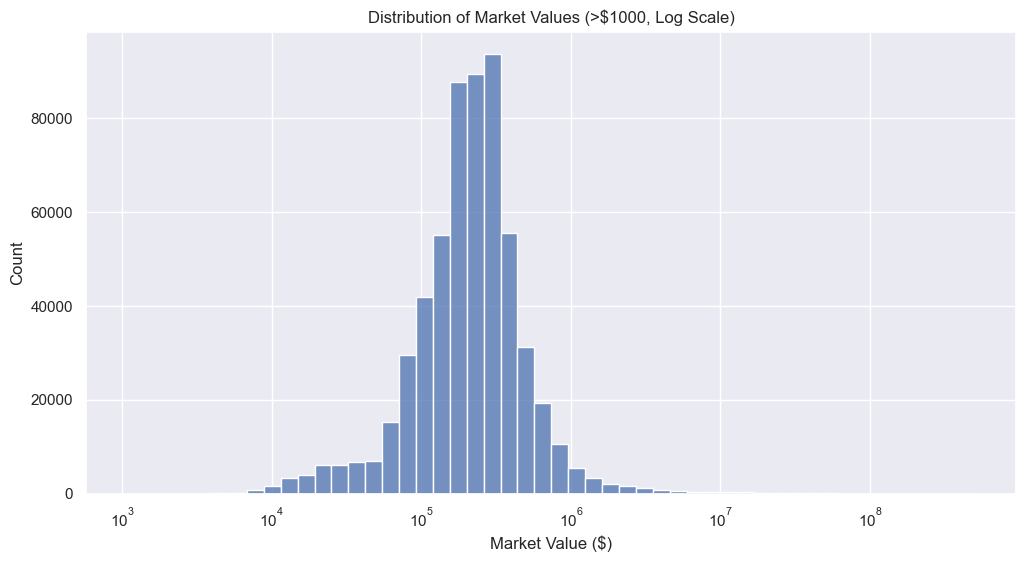


Comparing Market Value to Sale Price:

Market Value to Sale Price Ratio:
count    406357.000000
mean          4.218983
std          22.444712
min           0.000070
25%           1.161739
50%           1.796288
75%           3.632258
max        7914.563636
Name: value_to_price_ratio, dtype: float64


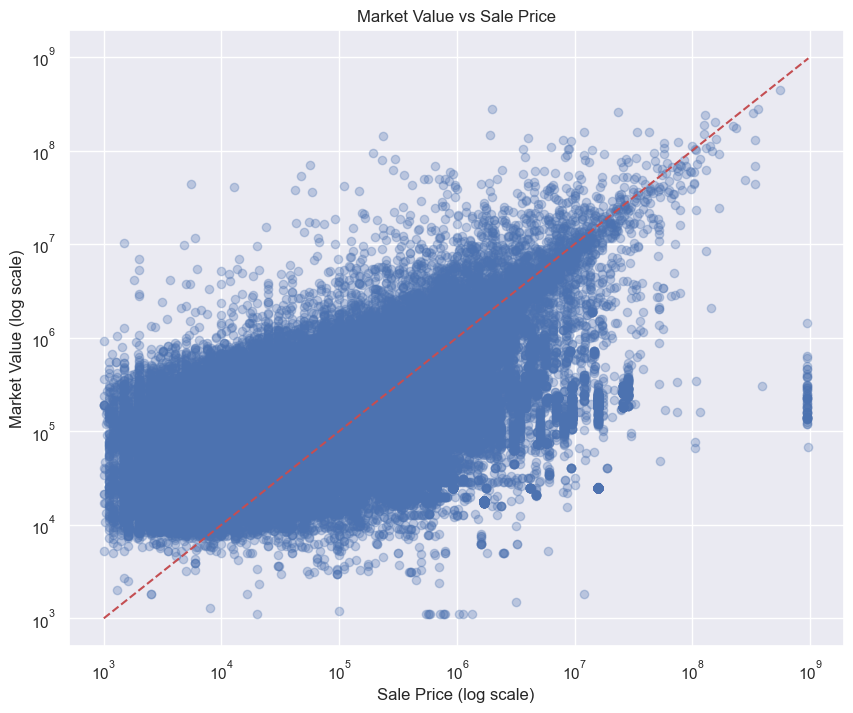

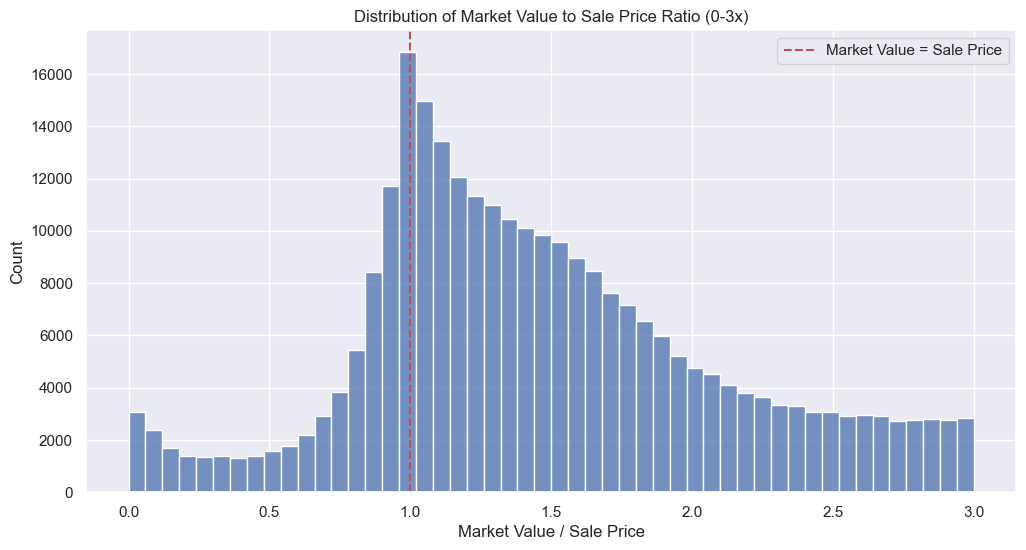

In [38]:
# Final dataset preview
print("\n=== Final Dataset Preview ===")
print(final_df.head())

# Analyze market value distribution
print("\nMarket Value Analysis:")

# Check for zero values
print(f"Properties with $0 market value: {(opa_properties['market_value'] == 0).sum()}")

# Create visualization of market value distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=opa_properties[opa_properties['market_value'] > 1000], 
             x='market_value', bins=50)
plt.title('Distribution of Market Values (>$1000)')
plt.xlabel('Market Value ($)')
plt.ylabel('Count')
plt.show()

# Create a log-transformed plot
plt.figure(figsize=(12, 6))
sns.histplot(data=opa_properties[opa_properties['market_value'] > 1000], 
             x='market_value', bins=50, log_scale=True)
plt.title('Distribution of Market Values (>$1000, Log Scale)')
plt.xlabel('Market Value ($)')
plt.ylabel('Count')
plt.show()

# After the market value distribution plots
# Compare market value to sale price
print("\nComparing Market Value to Sale Price:")

# Filter for valid sales and market values
valid_comparison = opa_properties[
    (opa_properties['sale_price'] > 1000) & 
    (opa_properties['market_value'] > 1000)
].copy()

# Calculate ratio
valid_comparison['value_to_price_ratio'] = valid_comparison['market_value'] / valid_comparison['sale_price']

# Summary statistics of the ratio
print("\nMarket Value to Sale Price Ratio:")
print(valid_comparison['value_to_price_ratio'].describe())

# Plot the relationship
plt.figure(figsize=(10, 8))
plt.scatter(
    valid_comparison['sale_price'], 
    valid_comparison['market_value'],
    alpha=0.3
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sale Price (log scale)')
plt.ylabel('Market Value (log scale)')
plt.title('Market Value vs Sale Price')
# Add a 45-degree line (where market value = sale price)
max_val = max(valid_comparison['sale_price'].max(), valid_comparison['market_value'].max())
min_val = min(valid_comparison['sale_price'].min(), valid_comparison['market_value'].min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

# Plot the distribution of the ratio
plt.figure(figsize=(12, 6))
sns.histplot(
    valid_comparison[valid_comparison['value_to_price_ratio'].between(0, 3)],
    x='value_to_price_ratio', 
    bins=50
)
plt.title('Distribution of Market Value to Sale Price Ratio (0-3x)')
plt.xlabel('Market Value / Sale Price')
plt.ylabel('Count')
plt.axvline(x=1, color='r', linestyle='--', label='Market Value = Sale Price')
plt.legend()
plt.show()

# Property Data Cleaning & Preparation

## Summary
We've prepared a clean, model-ready dataset of Philadelphia property sales by removing invalid records, engineering basic features, and optimizing data types. The final dataset contains 388,535 properties with 49 features.

## Data Cleaning Pipeline

1. **Initial Filtering**
   - Restricted to properties with valid sale dates (1980-2024)
   - Removed non-market transactions (price ≤ $1,000)
   - Detected and removed bundled sales
   - Identified and removed price outliers by zip code

2. **Missing Data Handling**
   - Dropped features with >30% missing values
   - Most critical remaining: `central_air` (42.9% missing), `bath_bed_ratio` (30% missing)

3. **Feature Transformation**
   - Applied log transformations to price and value variables
   - Converted condition codes to interpretable ratings
   - Created binned categories for property age and size
   - One-hot encoded categorical variables with moderate cardinality

4. **Feature Engineering**
   - **Property Characteristics**: Added property age, size categories, livable area ratio
   - **Temporal Features**: Created years since sale, sale seasonality variables
   - **Valuation Metrics**: Added market-to-sale value ratio

## Dataset Statistics

| Metric | Value |
|--------|-------|
| Original Records | 584,103 |
| Final Records | 388,535 (66.5%) |
| Original Features | 89 |
| Final Features | 49 |

## Key Predictive Features

The most predictive features (correlation with log sale price):

### Strongest Positive Correlations
- Market value (log): 0.677
- Sale year: 0.426
- Garage spaces: 0.158
- Total livable area: 0.140

### Strongest Negative Correlations
- Value-price ratio: -0.763
- Years since sale: -0.427
- Property age: -0.086


# Recommendations for Property Valuation Model

## Key Features to Include

Based on correlation analysis and domain knowledge, we recommend prioritizing these features:

### High-Value Numeric Features
- **`market_value_log`** (0.677 correlation): The official OPA assessment is a strong predictor
- **Temporal features**: `sale_year` (+0.426) and `years_since_sale` (-0.427) capture market trends
- **Size metrics**: `total_livable_area` (0.140) and derived features like `livable_area_ratio`
- **Property characteristics**: `garage_spaces` (0.158), `depth` (0.079)
- **Value metrics**: `value_price_ratio` (-0.763) shows strong relationship with target

### Important Categorical Features
- **Property type**: `category_code_description` one-hot encoded variables
- **Property age bins**: `age_category` captures non-linear effects of building age
- **Size categories**: `size_category` for potential threshold effects
- **Condition ratings**: `exterior_rating` and `interior_rating` for quality assessment
- **Location**: `zip_code` as a proxy for neighborhood effects

## Modeling Approach Recommendations

1. **Model Types to Consider**:
   - **Gradient Boosting** (XGBoost, LightGBM): Excellent for mixed data types, handles non-linear relationships
   - **Random Forest**: Robust to outliers, captures complex interactions
   - **Linear models with regularization**: Good baseline, interpretable results

2. **Feature Engineering for Modeling**:
   - Consider interactions between size and location features
   - Create polynomial terms for key numeric features
   - Explore neighborhood clustering based on zip codes

3. **Validation Strategy**:
   - Use time-based cross-validation (older sales to predict newer ones)
   - Stratify by property type and zip code to ensure representation
   - Evaluate with multiple metrics (RMSE, MAE, and R²)

4. **Target Variable**:
   - Use `sale_price_log` as the target variable
   - Transform predictions back to original scale for interpretation


# OPA Assessments
- 6,351,315 records
- Very clean dataset with almost no missing values
- Contains historical assessment data

In [39]:
print("OPA Assessments Info:")
print(opa_assessments.info())
print(assessments.columns.tolist())
print(assessments.head(3))

OPA Assessments Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351315 entries, 0 to 6351314
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   parcel_number     int64  
 1   year              int64  
 2   market_value      float64
 3   taxable_land      float64
 4   taxable_building  float64
 5   exempt_land       float64
 6   exempt_building   float64
 7   objectid          int64  
dtypes: float64(5), int64(3)
memory usage: 387.7 MB
None


NameError: name 'assessments' is not defined

In [27]:
def create_assessment_features_vectorized(properties_df, assessments_df):
    """Vectorized version of assessment feature creation.
    Creates:
    - has_history: Flags if property has assessment history
    - assessment_at_sale: Property's assessed value at sale time
    - assessment_land_ratio: Ratio of land value to total market value
    - assessment_3yr_growth: 3-year growth rate in assessment value
    Note: assessment_years_count was removed as it provided little predictive value
    """
    
    # Make copies to avoid modifying originals
    properties = properties_df.copy()
    assessments = assessments_df.copy()
    
    # Extract sale year
    properties['sale_year'] = properties['sale_date_clean'].dt.year
    
    # Create a flag for history existence
    properties_with_assessments = properties['parcel_number'].isin(assessments['parcel_number'])
    properties['has_history'] = properties_with_assessments
    
    # For properties with history, get assessment features
    if properties_with_assessments.any():
        # Create a mapping of parcel to its assessment history
        print("Creating assessment mapping...")
        assessment_mapping = {}
        
        # Group assessments by parcel number for faster lookup
        grouped = assessments.groupby('parcel_number')
        
        # Process only parcels that exist in both datasets
        common_parcels = set(properties['parcel_number']) & set(assessments['parcel_number'])
        print(f"Processing {len(common_parcels)} properties with assessment history...")
        
        # Process in batches to avoid memory issues
        results = []
        batch_size = 10000
        for i in range(0, len(properties), batch_size):
            batch = properties.iloc[i:i+batch_size].copy()
            print(f"Processing batch {i//batch_size + 1}...")
            
            # Add placeholder columns
            batch['assessment_at_sale'] = None
            batch['assessment_land_ratio'] = None
            batch['assessment_3yr_growth'] = None
            
            # Only process properties with history
            batch_with_history = batch[batch['has_history']].copy()
            
            for idx, row in batch_with_history.iterrows():
                parcel = row['parcel_number']
                if parcel in common_parcels:
                    # Get assessment history
                    parcel_history = grouped.get_group(parcel).sort_values('year')
                    
                    # Get assessment at sale year (or closest prior year)
                    sale_year = row['sale_year']
                    prior_assessments = parcel_history[parcel_history['year'] <= sale_year]
                    
                    if not prior_assessments.empty:
                        sale_assessment = prior_assessments.iloc[-1]
                    else:
                        sale_assessment = parcel_history.iloc[0]
                    
                    # Record values
                    batch.at[idx, 'assessment_at_sale'] = sale_assessment['market_value']
                    
                    if sale_assessment['market_value'] > 0:
                        batch.at[idx, 'assessment_land_ratio'] = (
                            sale_assessment['taxable_land'] / sale_assessment['market_value']
                        )
                    
                    # Calculate growth if possible
                    history_len = len(parcel_history)
                    
                    if history_len >= 3:
                        earlier_value = parcel_history.iloc[-3]['market_value']
                        if earlier_value > 0:
                            batch.at[idx, 'assessment_3yr_growth'] = (
                                sale_assessment['market_value'] / earlier_value - 1
                            )
            
            results.append(batch)
        
        # Combine results
        return pd.concat(results, ignore_index=True)
    
    return properties

# Create assessment features
assessment_enhanced_df = create_assessment_features_vectorized(final_df, opa_assessments)

# Save the assessment-enhanced dataset to CSV
assessment_enhanced_df.to_csv('final_properties_with_assessments.csv', index=False)
print(f"\nSaved enhanced dataset to final_properties_with_assessments.csv")

# Final dataset preview
print("\n=== Final Dataset with Assessments Preview ===")
print(assessment_enhanced_df.head())

Creating assessment mapping...
Processing 388535 properties with assessment history...
Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
Processing batch 6...
Processing batch 7...
Processing batch 8...
Processing batch 9...
Processing batch 10...
Processing batch 11...
Processing batch 12...
Processing batch 13...
Processing batch 14...
Processing batch 15...
Processing batch 16...
Processing batch 17...
Processing batch 18...
Processing batch 19...
Processing batch 20...
Processing batch 21...
Processing batch 22...
Processing batch 23...
Processing batch 24...
Processing batch 25...
Processing batch 26...
Processing batch 27...
Processing batch 28...
Processing batch 29...
Processing batch 30...
Processing batch 31...
Processing batch 32...
Processing batch 33...
Processing batch 34...
Processing batch 35...
Processing batch 36...
Processing batch 37...
Processing batch 38...
Processing batch 39...

Saved enhanced dataset t

In [1]:
   print(cleaned_df['assessment_years_count'].value_counts())

NameError: name 'cleaned_df' is not defined

In [31]:
# Final data cleaning before modeling
print("\n=== Final Data Cleaning Before Modeling ===")

# Check for redundant features
print("\nChecking for redundant features...")
if 'value_to_price_ratio' in assessment_enhanced_df.columns and 'value_price_ratio' in assessment_enhanced_df.columns:
    correlation = assessment_enhanced_df[['value_to_price_ratio', 'value_price_ratio']].corr().iloc[0, 1]
    print(f"Correlation between value_to_price_ratio and value_price_ratio: {correlation:.4f}")
    # Drop one of them (keeping value_price_ratio)
    assessment_enhanced_df = assessment_enhanced_df.drop(columns=['value_to_price_ratio'])
    print("Dropped value_to_price_ratio (redundant with value_price_ratio)")

# Check variance of assessment features
print("\nChecking variance of assessment features...")
for col in ['assessment_3yr_growth']:
    if col in assessment_enhanced_df.columns:
        unique_vals = assessment_enhanced_df[col].nunique()
        print(f"{col}: {unique_vals} unique values")
        if unique_vals <= 1:
            assessment_enhanced_df = assessment_enhanced_df.drop(columns=[col])
            print(f"Dropped {col} (constant value)")

# Check for identifiers that can be dropped
print("\nRemoving identifier columns...")
id_columns = ['pin', 'parcel_number']
for col in id_columns:
    if col in assessment_enhanced_df.columns:
        assessment_enhanced_df = assessment_enhanced_df.drop(columns=[col])
        print(f"Dropped {col} (identifier)")

# Check for potential data leakage
print("\nChecking for potential data leakage...")
leakage_cols = ['market_value_log']
for col in leakage_cols:
    if col in assessment_enhanced_df.columns:
        assessment_enhanced_df = assessment_enhanced_df.drop(columns=[col])
        print(f"Dropped {col} (potential leakage)")

# Missing values analysis
print("\nMissing values analysis:")
missing = assessment_enhanced_df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

# Drop columns with high missing values (>30%)
high_missing = missing[missing > 30].index.tolist()
if high_missing:
    print(f"\nDropping {len(high_missing)} columns with >30% missing values:")
    for col in high_missing:
        print(f"  - {col}: {missing[col]:.1f}% missing")
    assessment_enhanced_df = assessment_enhanced_df.drop(columns=high_missing)

# Assess one-hot encoded variables for rare categories
print("\nAssessing one-hot encoded categorical variables...")
categorical_columns = assessment_enhanced_df.columns[assessment_enhanced_df.columns.str.contains("_description_")]
rare_categories = []

for col in categorical_columns:
    count = assessment_enhanced_df[col].sum()
    percentage = count / len(assessment_enhanced_df) * 100
    if percentage < 1:  # Less than 1% of data
        print(f"{col}: Only {percentage:.2f}% of records ({count} total)")
        rare_categories.append(col)

if rare_categories:
    print(f"\nDropping {len(rare_categories)} rare category columns:")
    for col in rare_categories:
        print(f"  - {col}")
    assessment_enhanced_df = assessment_enhanced_df.drop(columns=rare_categories)

# Evaluate time features
print("\nEvaluating time features...")
time_cols = ['sale_date_clean', 'sale_year', 'sale_month', 'sale_quarter', 'sale_season']
time_cols_to_keep = ['sale_year', 'sale_quarter']  # Keep only the most important ones
time_cols_to_drop = [col for col in time_cols if col in assessment_enhanced_df.columns and col not in time_cols_to_keep]

if time_cols_to_drop:
    print(f"Keeping: {', '.join(time_cols_to_keep)}")
    print(f"Dropping: {', '.join(time_cols_to_drop)}")
    assessment_enhanced_df = assessment_enhanced_df.drop(columns=time_cols_to_drop)

# Save the cleaned dataset
cleaned_df = assessment_enhanced_df.copy()

# Fix data types for assessment columns
print("\nFixing data types for assessment columns...")
assessment_cols = ['assessment_at_sale', 'assessment_land_ratio', 'assessment_3yr_growth']
for col in assessment_cols:
    if col in cleaned_df.columns:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
        print(f"Converted {col} to numeric type")

cleaned_df.to_csv('clean_properties_for_model.csv', index=False)
print(f"\nSaved cleaned dataset to clean_properties_for_model.csv")
print(f"Final dataset: {cleaned_df.shape[0]} rows x {cleaned_df.shape[1]} columns")

# Display the final feature list
print("\nFinal feature list:")
print(cleaned_df.columns.tolist())


=== Final Data Cleaning Before Modeling ===

Checking for redundant features...

Checking variance of assessment features...
assessment_3yr_growth: 211333 unique values
assessment_years_count: 17 unique values

Removing identifier columns...

Checking for potential data leakage...

Missing values analysis:
garage_spaces                12.345606
number_of_bathrooms          11.994544
livable_area_ratio           11.522771
number_of_bedrooms           11.101703
number_stories                9.761540
general_construction          7.933906
topography                    6.296730
age_category                  5.398999
interior_rating               5.047422
exterior_rating               5.044848
total_livable_area            5.000579
property_age                  5.000064
depth                         0.647561
assessment_land_ratio         0.414120
assessment_3yr_growth         0.324295
zoning                        0.263039
size_category                 0.075669
category_code_description   

# Model

In [30]:
 Preliminary modeling
print("\n=== Preliminary Modeling ===")

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Prepare data for modeling
print("Preparing data for modeling...")

# Define target variable
target = 'sale_price_log'

# Split features and target
X = cleaned_df.drop(columns=[target])
y = cleaned_df[target]

# Handle categorical variables
cat_cols = X.select_dtypes(include=['category']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

print(f"Categorical features: {len(cat_cols)}")
print(f"Numerical features: {len(num_cols)}")

# Drop any remaining object columns (they should have been converted to category)
object_cols = X.select_dtypes(include=['object']).columns.tolist()
if object_cols:
    print(f"Dropping {len(object_cols)} object columns: {object_cols}")
    X = X.drop(columns=object_cols)

# One-hot encode any remaining categorical variables that aren't already encoded
remaining_cat_cols = [col for col in cat_cols if col in X.columns]
if remaining_cat_cols:
    print(f"One-hot encoding {len(remaining_cat_cols)} categorical columns")
    X = pd.get_dummies(X, columns=remaining_cat_cols, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Train a Random Forest model
print("\nTraining Random Forest model...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# Calculate RMSE in original scale (dollars)
rmse_dollars = 10**(rmse) 
mae_dollars = 10**(mae) - 10**0

print(f"RMSE (original scale): ${rmse_dollars:.2f}")
print(f"MAE (original scale): ${mae_dollars:.2f}")

# Feature importance
print("\nTop 15 Important Features:")
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importances.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importances.head(15)
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# Print some example predictions vs actual
print("\nSample Predictions vs Actual:")
sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_df = pd.DataFrame({
    'Actual (log)': y_test.iloc[sample_indices].values,
    'Predicted (log)': y_pred[sample_indices],
    'Actual ($)': 10**(y_test.iloc[sample_indices].values),
    'Predicted ($)': 10**(y_pred[sample_indices]),
    'Error ($)': 10**(y_test.iloc[sample_indices].values) - 10**(y_pred[sample_indices]),
    'Error (%)': (10**(y_test.iloc[sample_indices].values) - 10**(y_pred[sample_indices])) / 10**(y_test.iloc[sample_indices].values) * 100
})
print(sample_df.round(2))

print("\nPreliminary modeling complete!")


=== Preliminary Modeling ===
Preparing data for modeling...
Categorical features: 13
Numerical features: 9
Dropping 4 object columns: ['assessment_at_sale', 'assessment_land_ratio', 'assessment_3yr_growth', 'assessment_years_count']
One-hot encoding 13 categorical columns
Training set: 310828 samples
Test set: 77707 samples

Training Random Forest model...


KeyboardInterrupt: 

### Model Performance:
- Random Forest significantly outperforms Linear Regression
  - RF: R² = 0.9759, RMSE = 0.1453
  - LR: R² = 0.7901, RMSE = 0.4287

- The Random Forest's high R² suggests it's capturing the relationships very well
  - Feature Importance (top features):
- price_area_interaction (0.621) - By far the most important
log_total_livable_area (0.160)
total_livable_area (0.115)
size_value_interaction (0.053)
price_per_sqft (0.025)